# The BNP Kaggle Project
-----
#### * TEAM NA (Ablat, Bin Lin, Claudia Huang, Sung Pil Moon )
![alt text](https://kaggle2.blob.core.windows.net/competitions/kaggle/4852/logos/front_page.png "BNP Paribas Cardif")

--- 

## 1. Overview

### 1.1. BNP's Overall Goal: To accelerate their claims management process

In this challenge, BNP Paribas Cardif is providing an anonymized database with two categories of claims:

1. claims for which approval could be accelerated leading to faster payments
2. claims for which additional information is required before approval

<br>

### 1.2. Our Goal (Operation): To predict the category of a claim

Prediction of a claim category based on features available early in the process, helping BNP Paribas Cardif accelerate its claims process and therefore provide a better service to its customers.

<br>

### 1.3. About the Data
* Total (<b>111,432 rows x 133 columns</b>)

In [1]:
####Check The Data Set
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
# Example: load a DSS dataset as a Pandas dataframe
train_dataset = dataiku.Dataset("train")
train_df = train_dataset.get_dataframe()

In [4]:
train_audit = pdu.audit(train_df)
train_audit

,_a_variable,_b_data_type,_c_cardinality,_d_missings,_e_sample_values
0,ID,int64,114321,0,"[3, 4]"
1,target,int64,2,0,"[1, 0]"
2,v1,float64,64488,49832,"[1.33573941541, nan]"
3,v2,float64,64525,49796,"[8.72747443554, nan]"
4,v3,object,4,3457,"[C, nan]"
5,v4,float64,64525,49796,"[3.9210257481, nan]"
6,v5,float64,65672,48624,"[7.91526571423, 9.19126518062]"
7,v6,float64,64488,49832,"[2.59927780824, nan]"
8,v7,float64,64490,49832,"[3.17689497363, nan]"
9,v8,float64,65689,48619,"[0.012941465862, 2.30163049167]"


### 1.4. Challenges: 
####  1. Anonymized Data
 * All data (both categorical and continuous) is anonymized without any description
 
#### 2. Too Many Missing Value .
 * Approximately 40% of data is missing
 ![alt text](https://www.kaggle.io/svf/175255/579bb6c64358a20cb74dfee8cc435f76/NAsPatternEq.png "NAs Pattern Eq")
 
 
 ![alt text](https://www.kaggle.io/svf/175255/579bb6c64358a20cb74dfee8cc435f76/NAsPatternAdj.png "NAs Pattern Adj")

--- 
### 1.4. Exploratory Data Analysis (EDA):
#### 1.4.1. Distribution of Numeric Values

In [ ]:
%pylab inline

import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from string import letters

In [10]:
# Load Train & Test dataset as a Pandas dataframe
dataset_train = dataiku.Dataset("train")
df_train = dataset_train.get_dataframe()
dataset_test = dataiku.Dataset("test")
df_test = dataset_test.get_dataframe()

In [12]:
train1 = df_train.drop(['ID'],axis=1)
test1 = df_test.drop(['ID'],axis=1)

In [13]:
target = train1.target
featureNames = train1.columns.values

In [14]:
def az_to_int(az,nanVal=None):
    if az==az:  #catch NaN
        hv = 0
        for i in range(len(az)):
            hv += (ord(az[i].lower())-ord('a')+1)*26**(len(az)-1-i)
        return hv
    else:
        if nanVal is not None:
            return nanVal
        else:
            return az

In [15]:
test1['target'] = -999
all_data = train1.append(test1)

# convert v22 to hexavigesimal
all_data.v22 = all_data.v22.apply(az_to_int)

for c in all_data.columns.values:
    if all_data[c].dtype=='object':
        all_data[c], tmpItter = all_data[c].factorize()

# replace all NA's with -1
all_data.fillna(-1, inplace=True)

# split the data
train1 = all_data[all_data['target']>-999]
test1 = all_data[all_data['target']==-999]
test1 = test1.drop(['target'],axis=1)

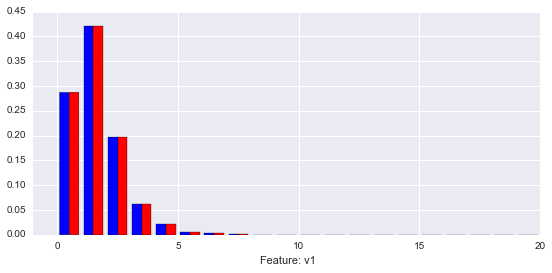

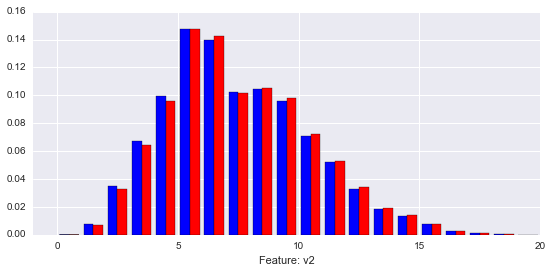

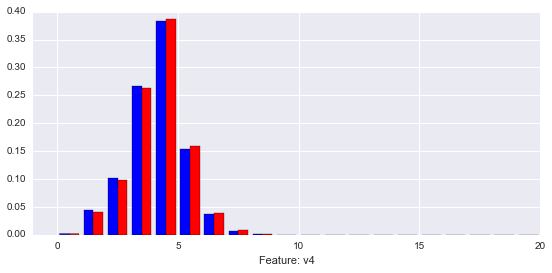

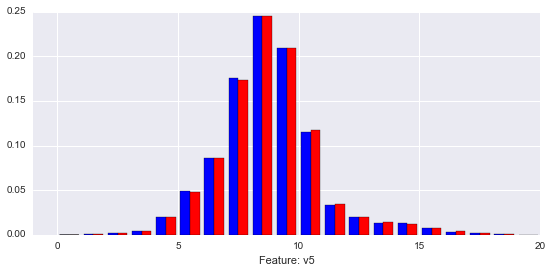

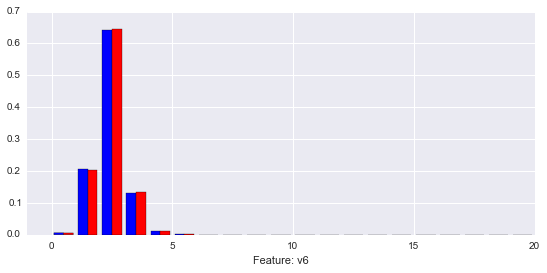

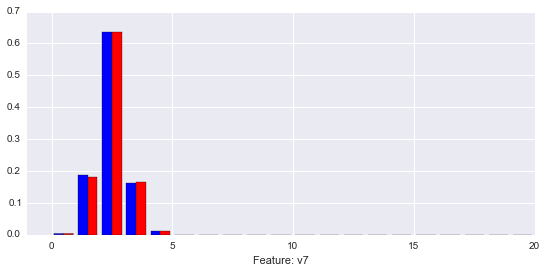

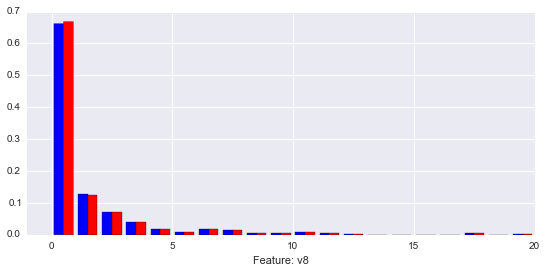

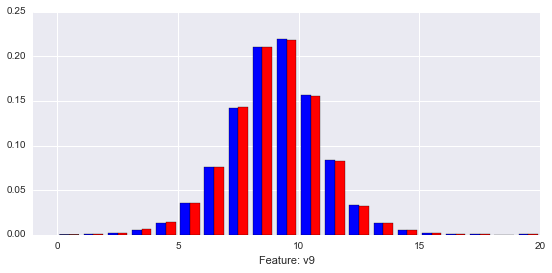

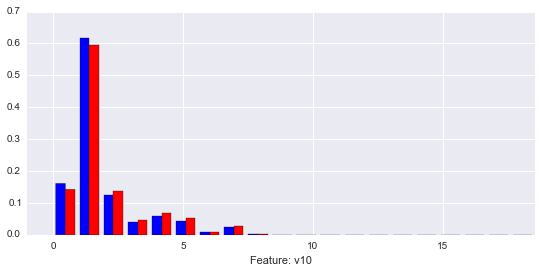

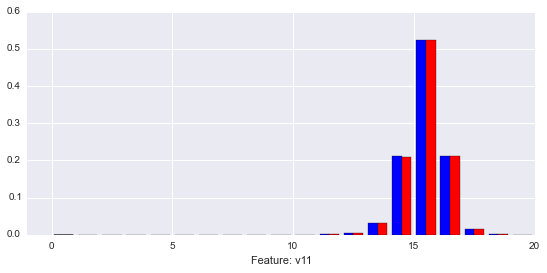

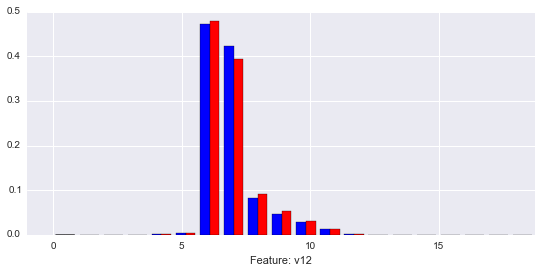

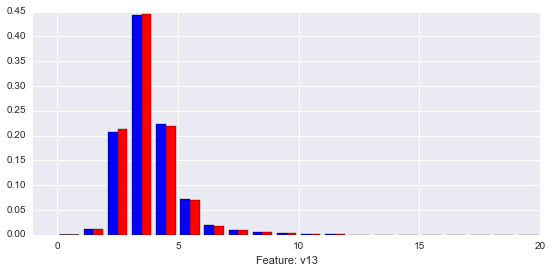

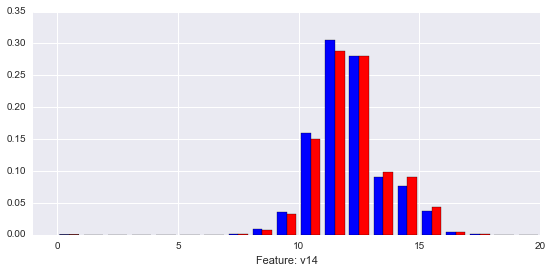

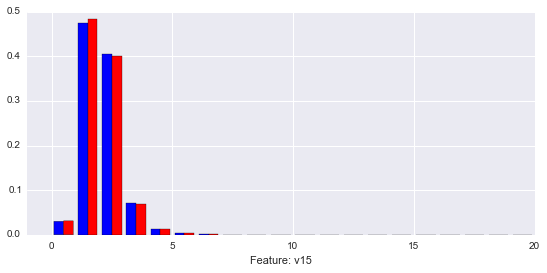

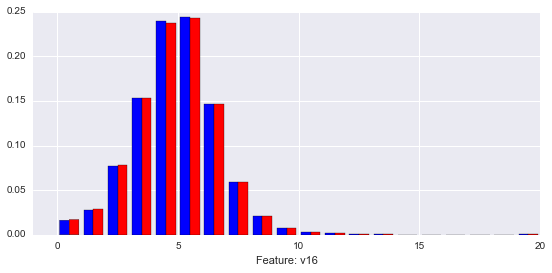

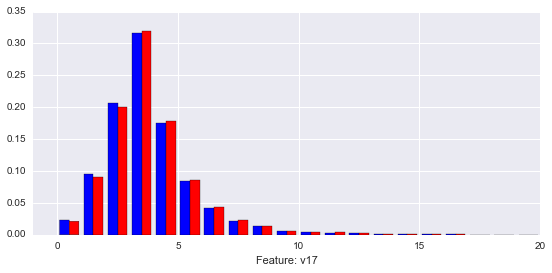

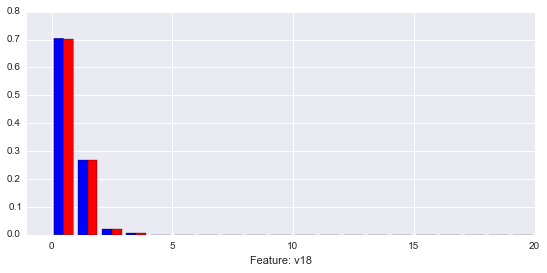

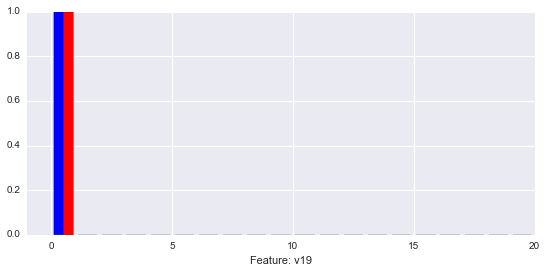

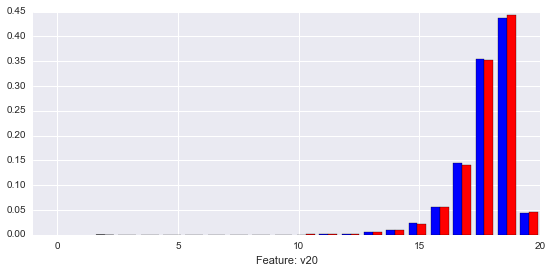

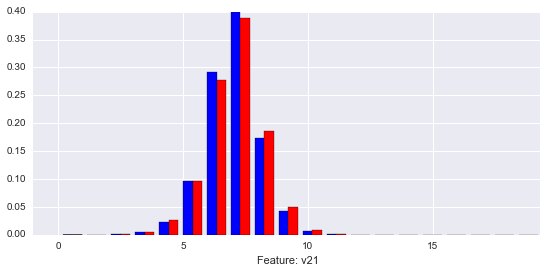

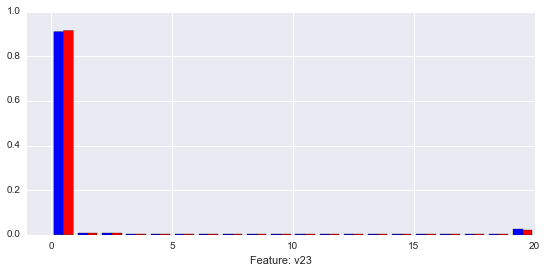

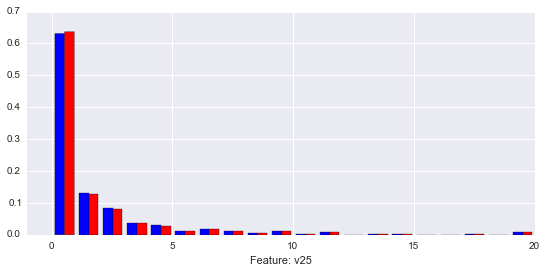

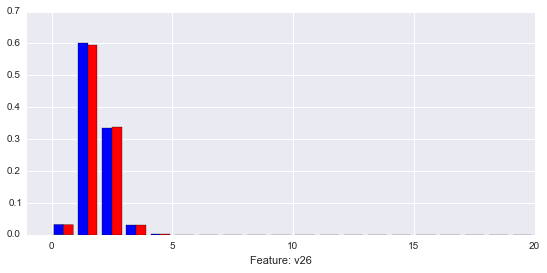

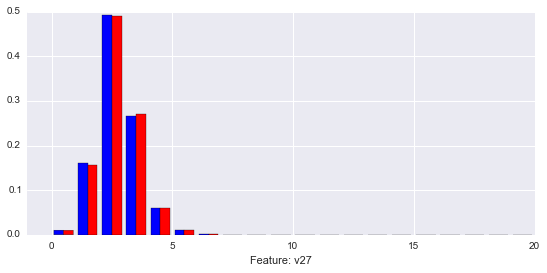

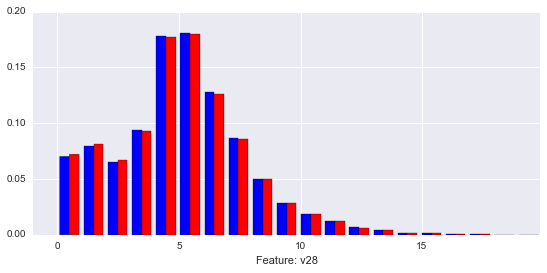

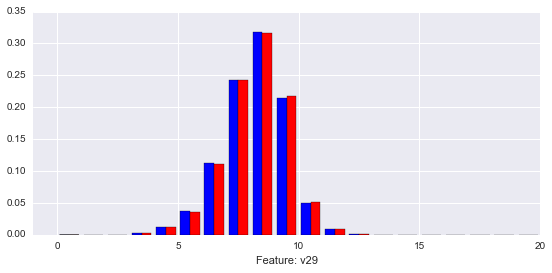

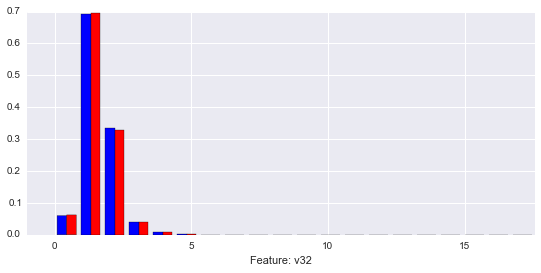

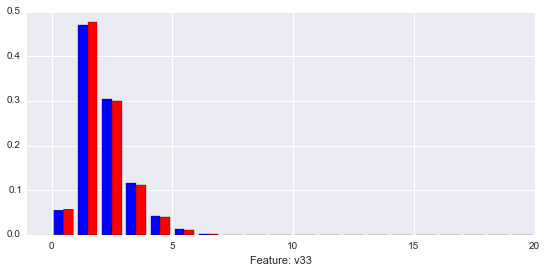

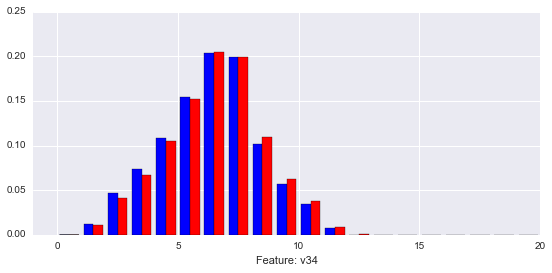

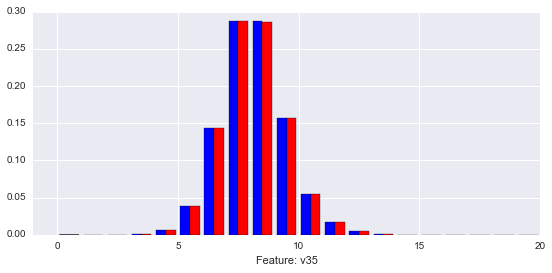

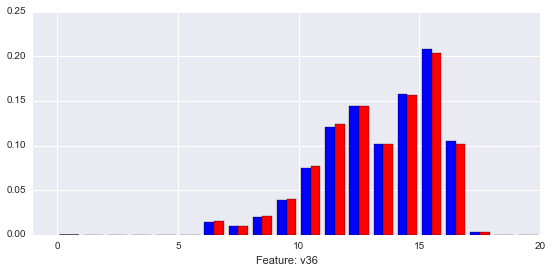

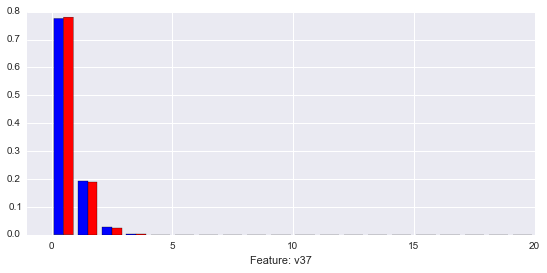

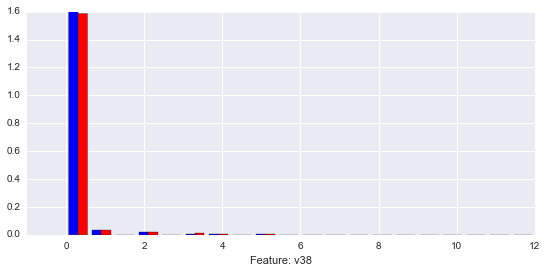

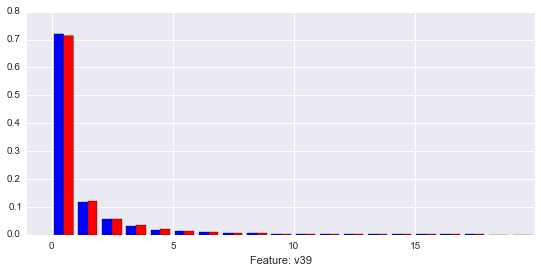

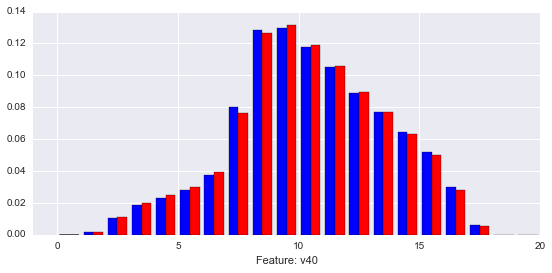

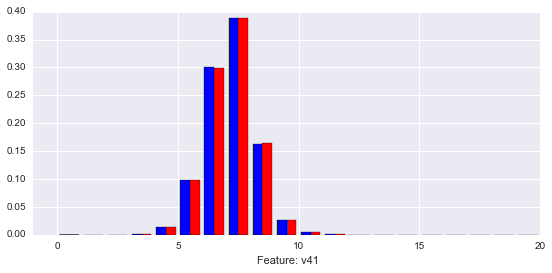

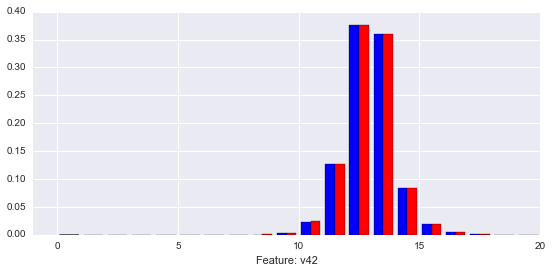

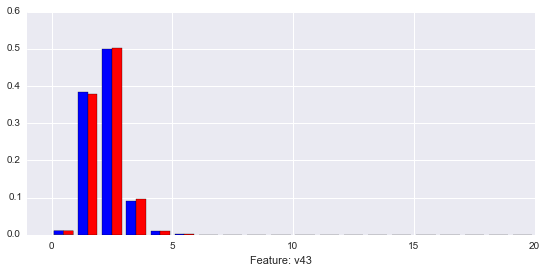

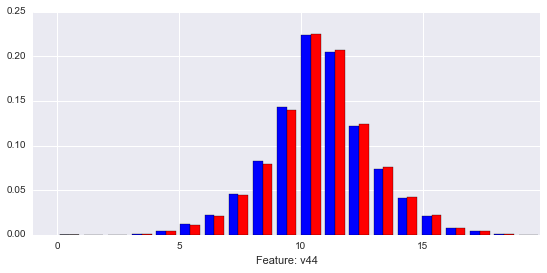

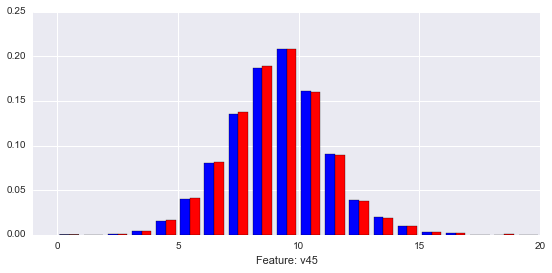

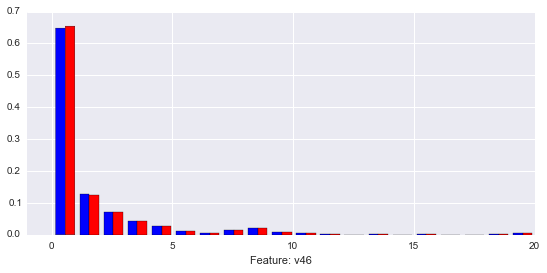

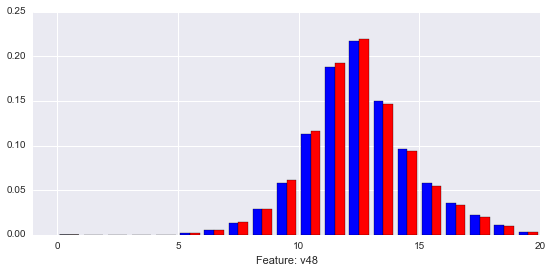

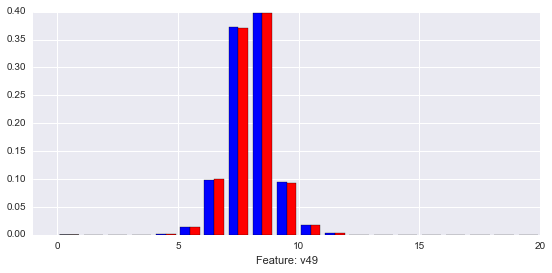

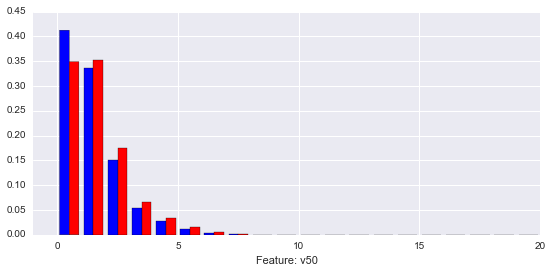

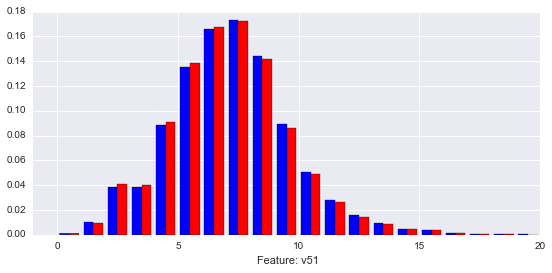

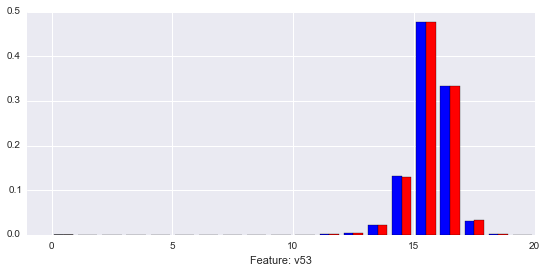

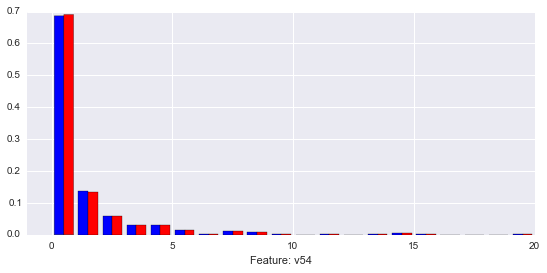

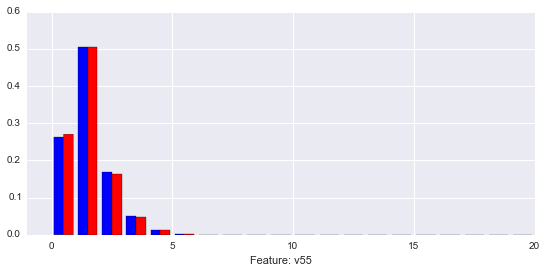

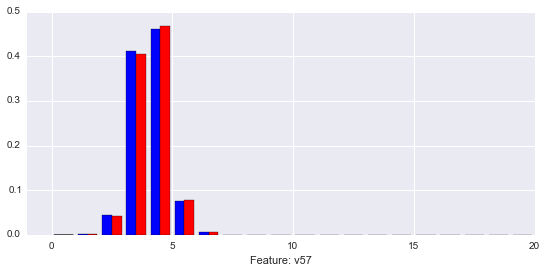

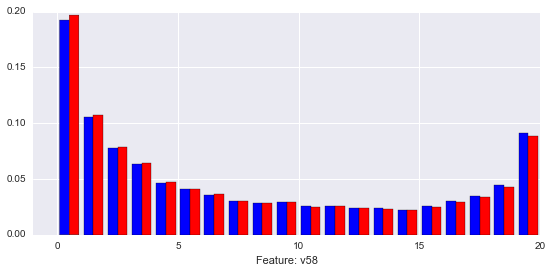

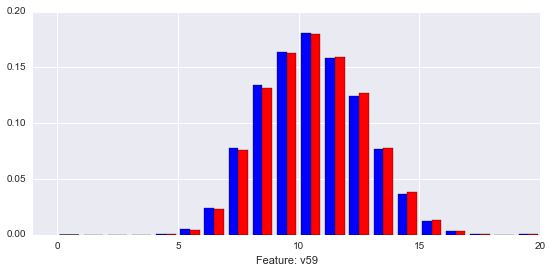

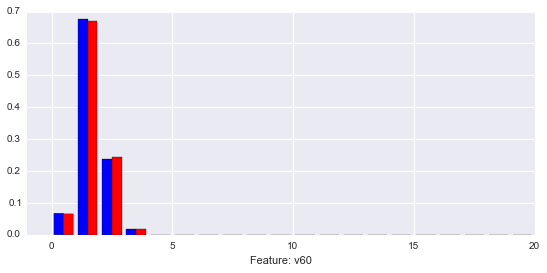

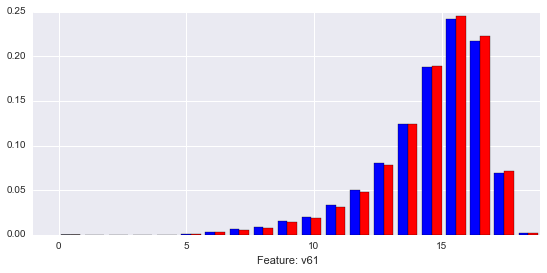

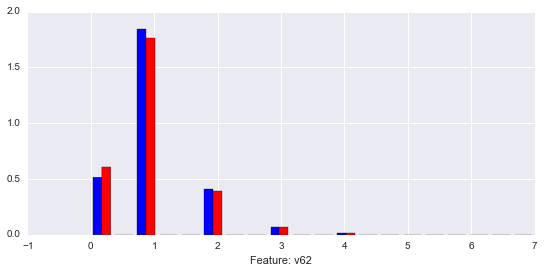

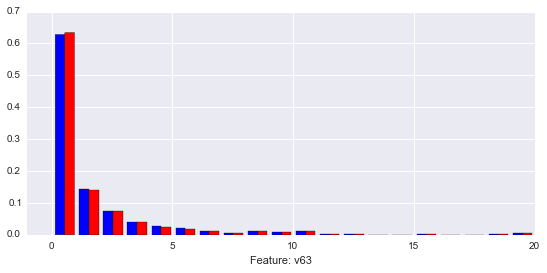

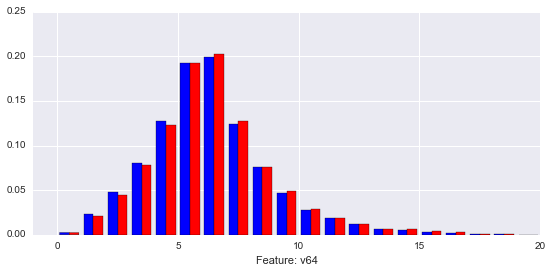

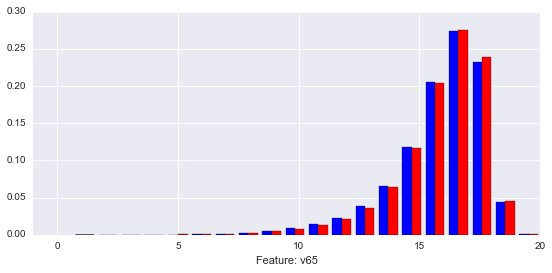

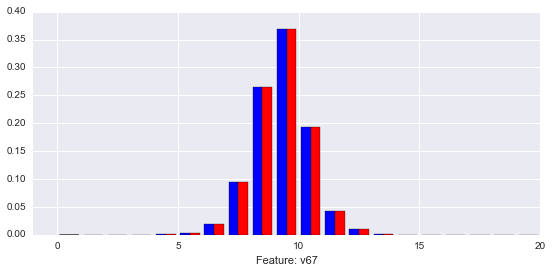

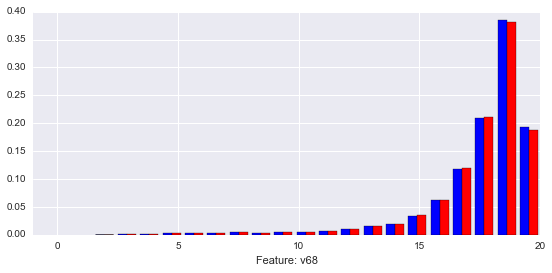

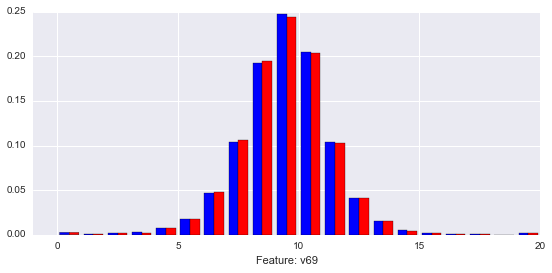

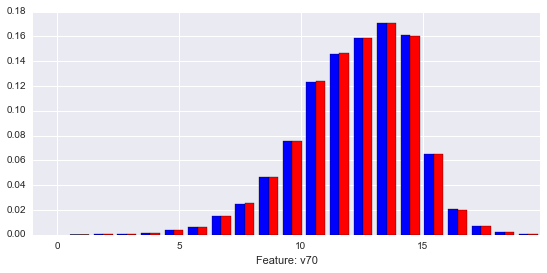

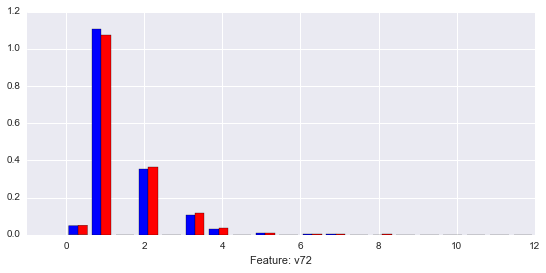

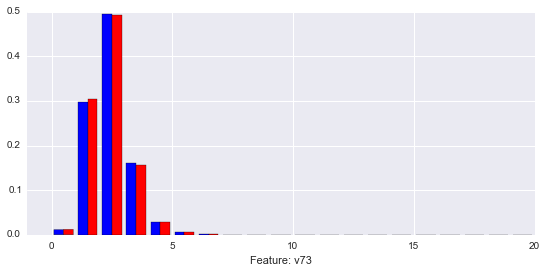

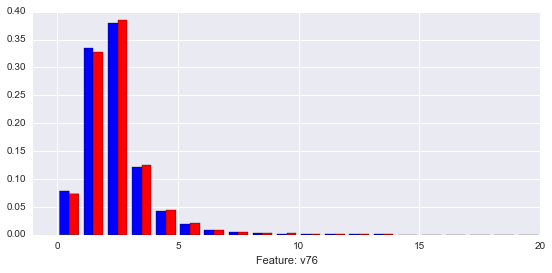

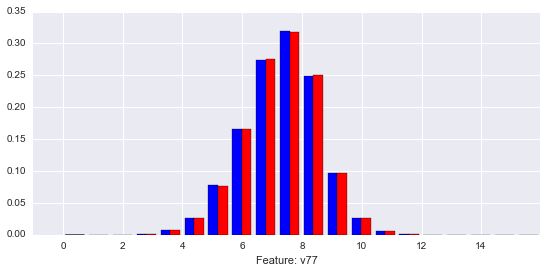

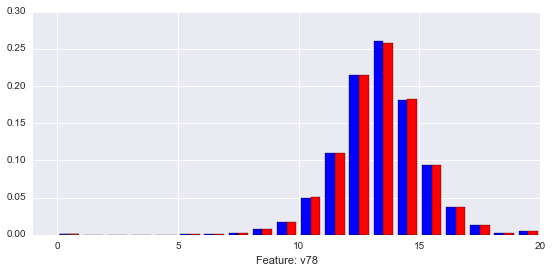

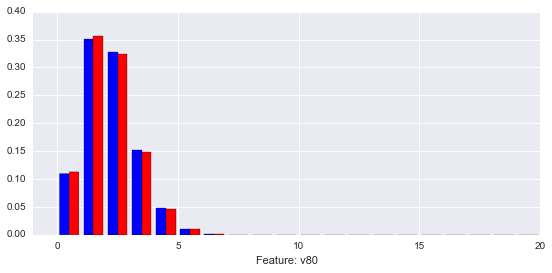

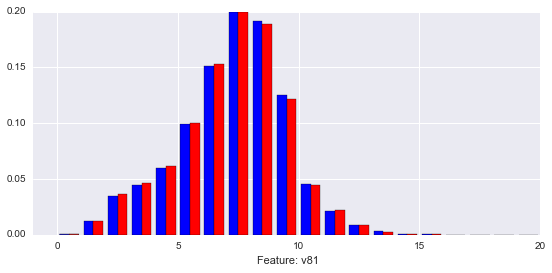

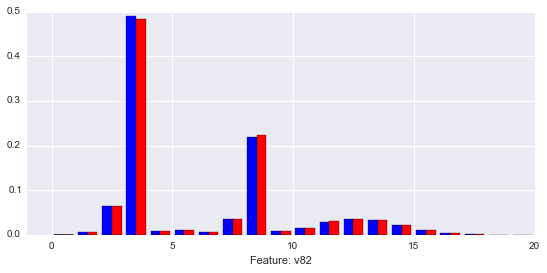

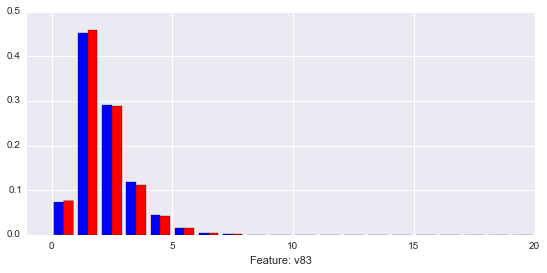

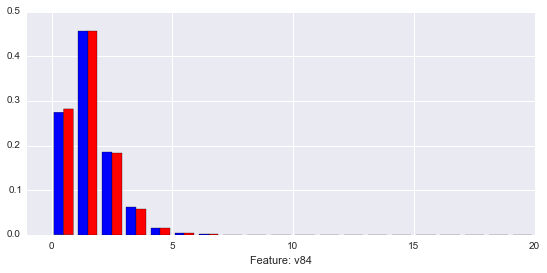

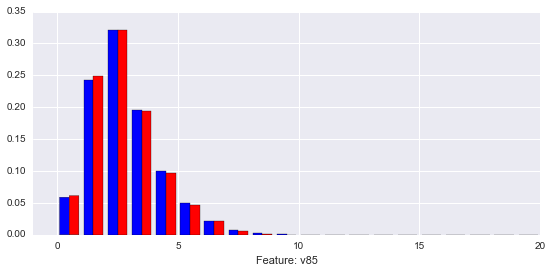

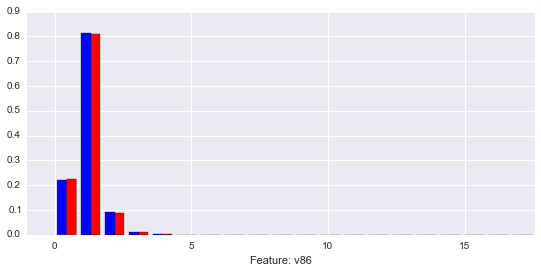

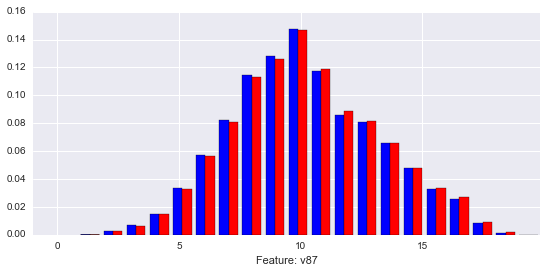

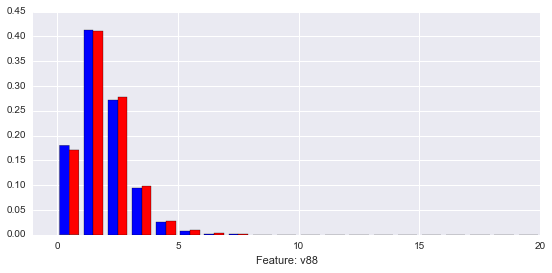

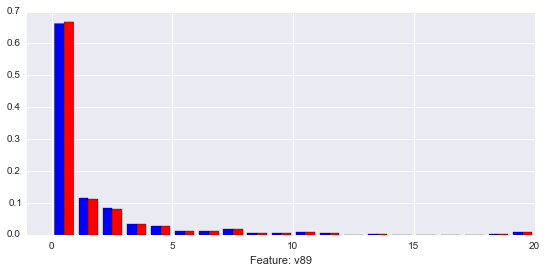

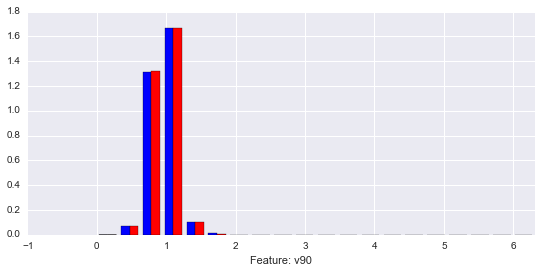

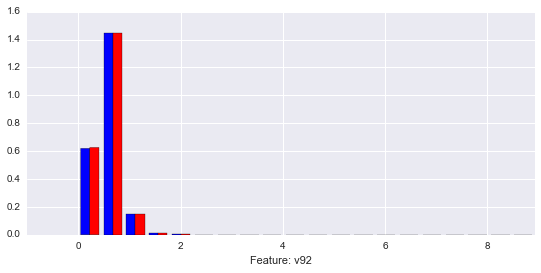

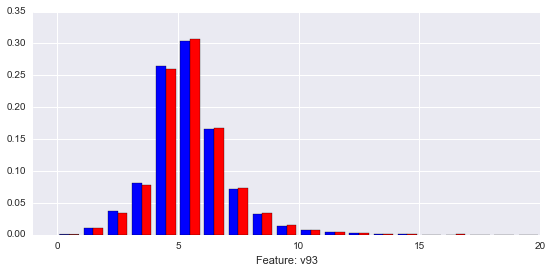

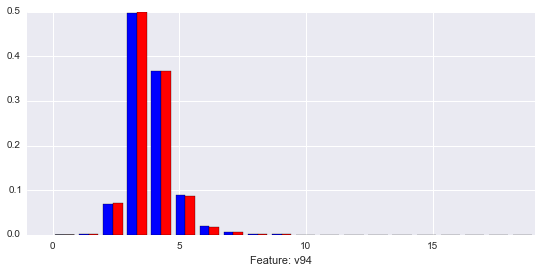

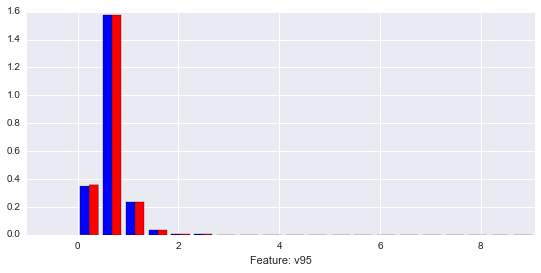

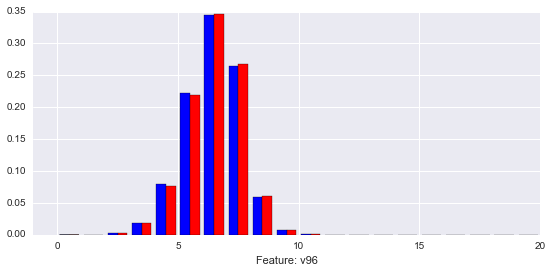

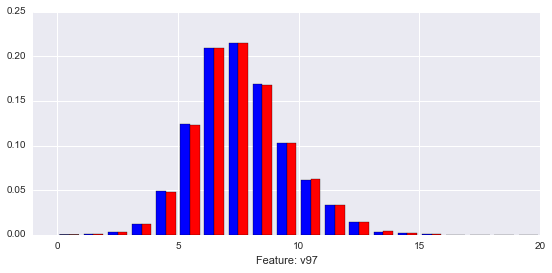

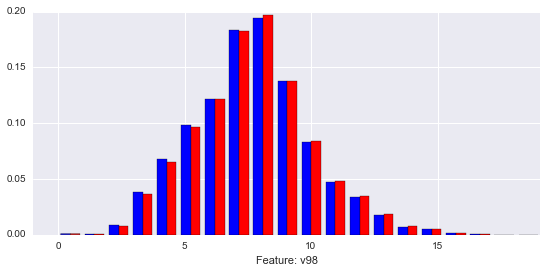

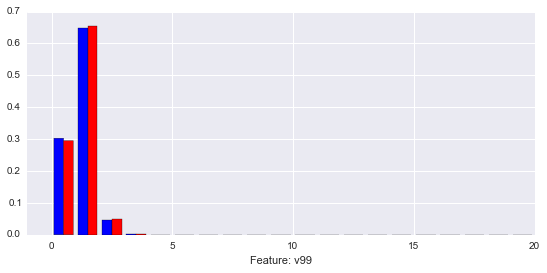

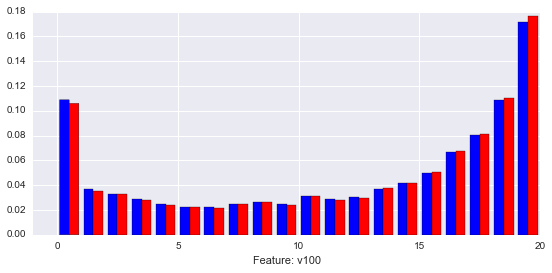

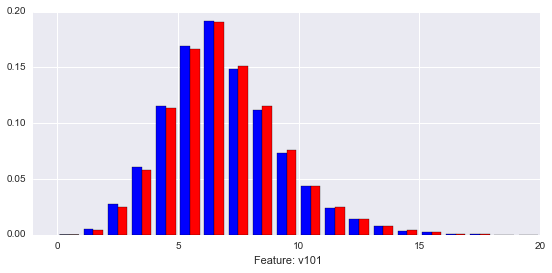

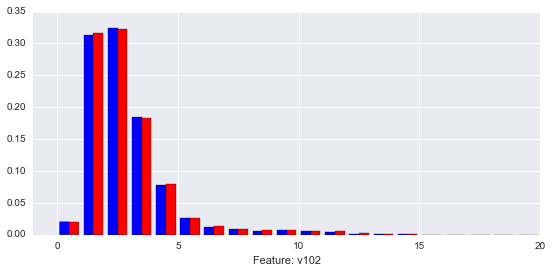

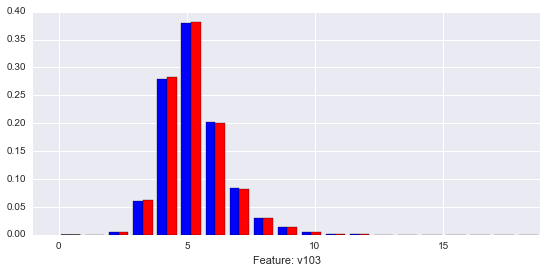

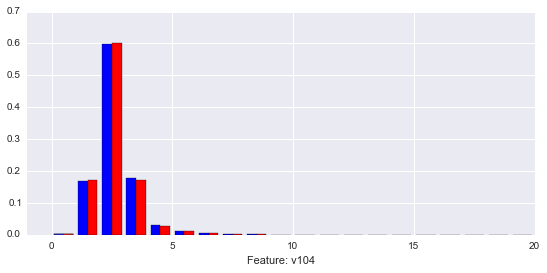

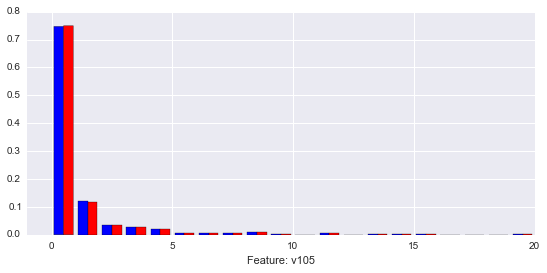

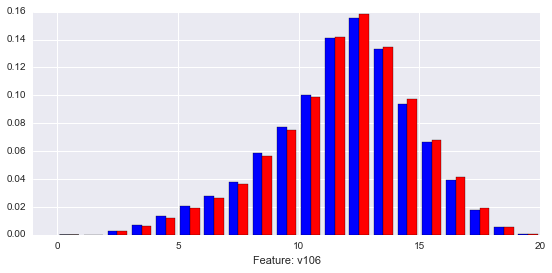

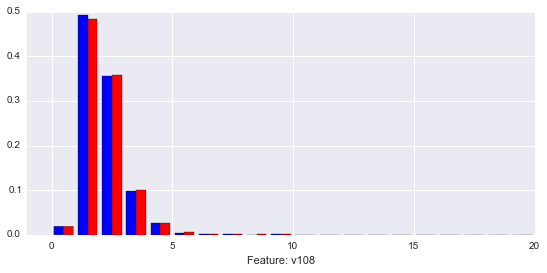

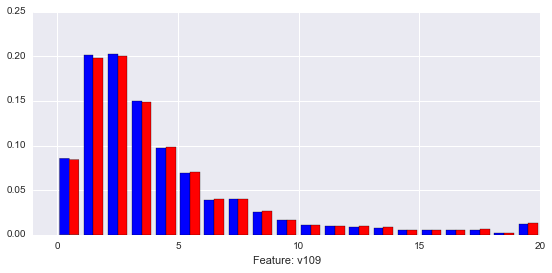

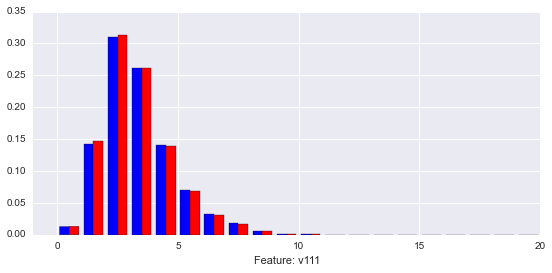

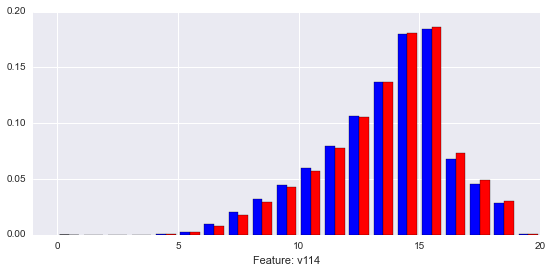

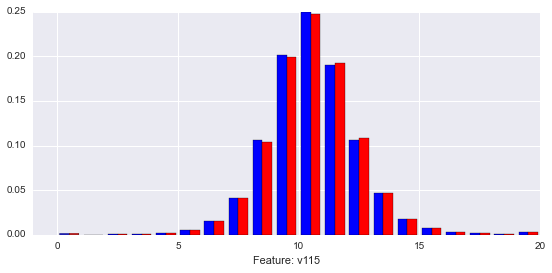

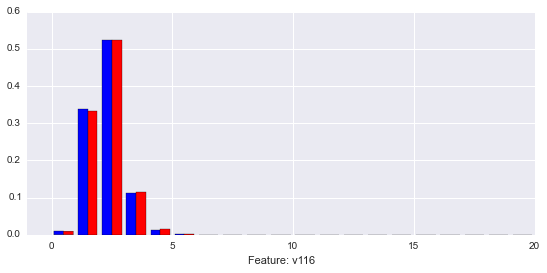

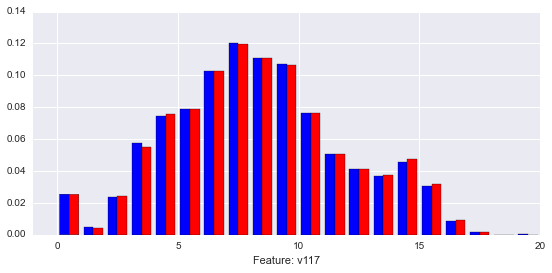

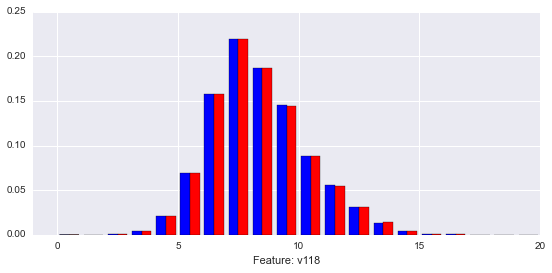

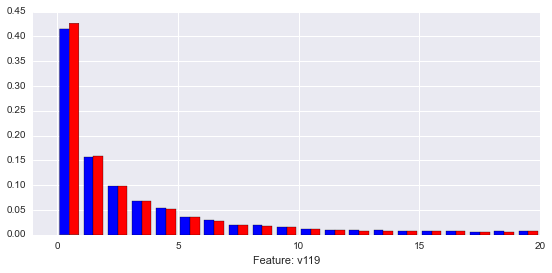

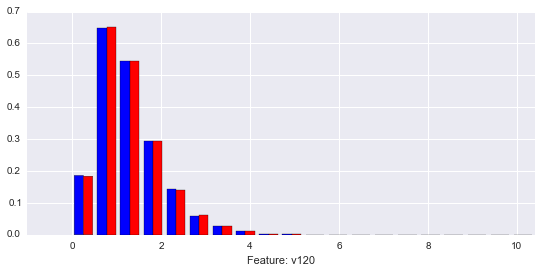

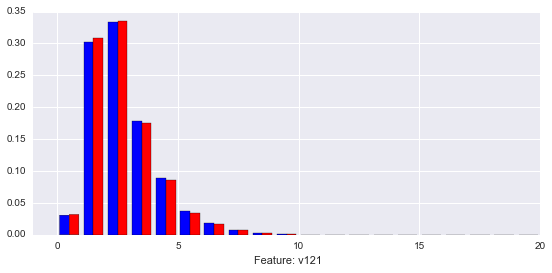

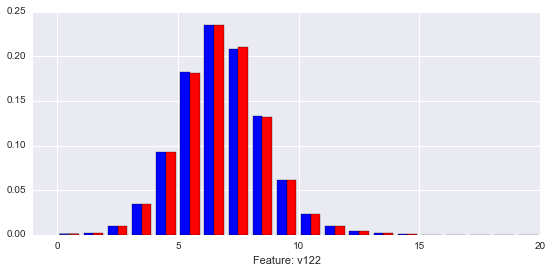

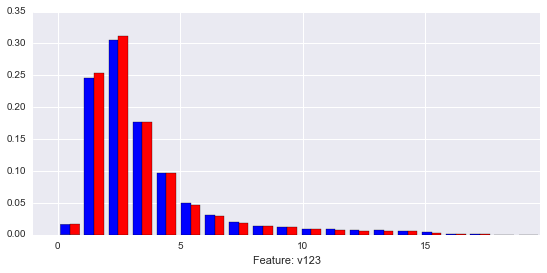

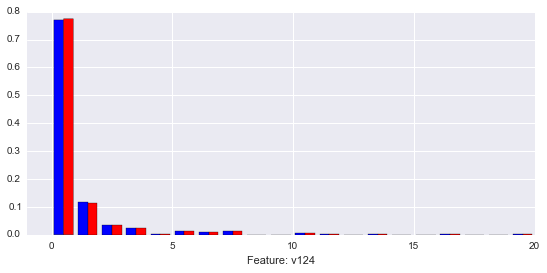

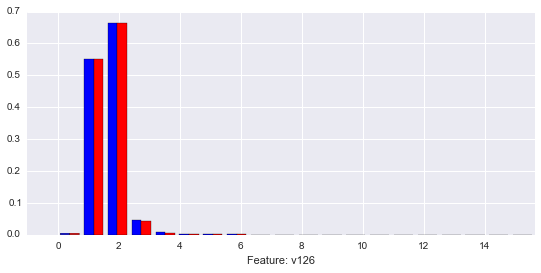

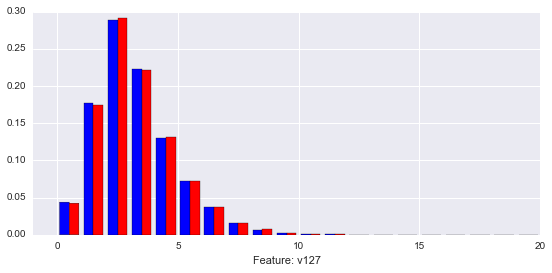

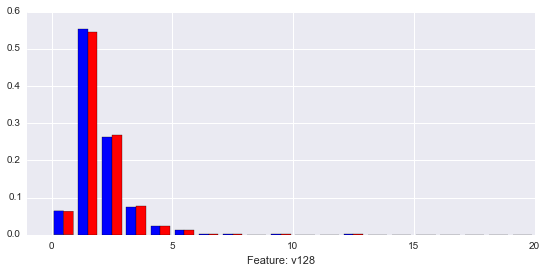

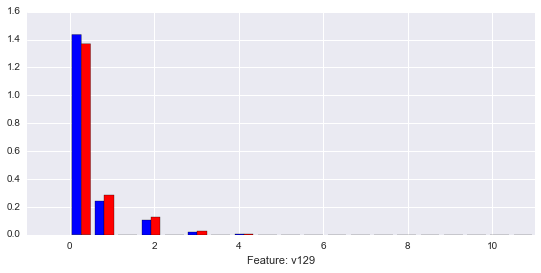

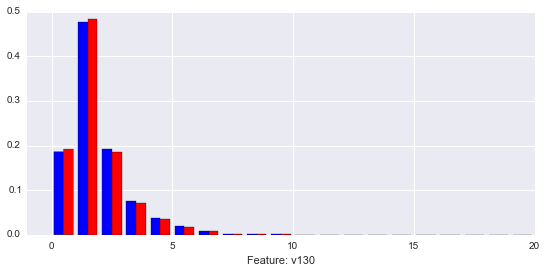

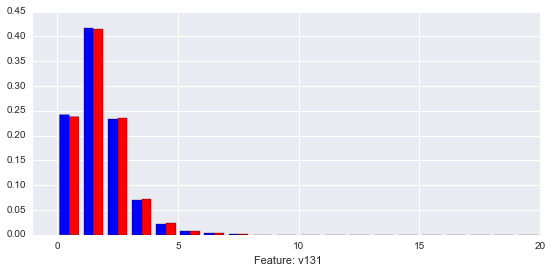

In [17]:
plt.rcParams['figure.max_open_warning']=300
nbins=20

for c in  featureNames:
    if train_df[c].dtype != 'object' and c != 'target':
        if c=='v22':
            hbins = 100
        else:
            hbins = nbins
        fig=plt.figure(figsize=(20,4))
        ax1 = fig.add_subplot(1,2,1) 
        
        dataset1 = train_df[c][~np.isnan(train_df[c])]
        dataset2 = train_df[c][~np.isnan(train_df[c]) & train_df.target]
        
        # left plot
        hd = ax1.hist((dataset1, dataset2), bins=hbins, histtype='bar',normed=True,
                        color=["blue", "red"],label=['all','target=1'])
        ax1.set_xlabel('Feature: '+c)
        ax1.set_xlim((-1,max(train_df[c])))
        
        binwidth = hd[1][1]-hd[1][0]
        midpts = (hd[1][:-1]+hd[1][1:])/2
        cdf_all= np.cumsum(hd[0][0])*binwidth
        cdf_ones = np.cumsum(hd[0][1])*binwidth
        
        # right plot
        '''
        ax2 = fig.add_subplot(1,2,2) 
        ax2.set_ylim((0,1))
        ax2.set_xlim((0,nbins))
        ax2.plot(midpts,cdf_all,color='b')
        ax2.plot(midpts,cdf_ones,color='r')
        ax2.plot(midpts,0.5+10*(cdf_all-cdf_ones),color='k')
        ax2.grid()
        ax2.set_xlim((-1,max(train_df[c])))
        ax2.set_xlabel('cdfs plus cdf_diff*10+0.5')
        ax2.axhline(0.5,color='gray',linestyle='--')
        '''

In [18]:
dataset_train = dataiku.Dataset("train")
df_train = dataset_train.get_dataframe()

<br>
#### 1.4.2. Correlation of Variables 
* <b>Correlation Matrix Plot </b>
    * To cluster the variables which have strong corelationship.

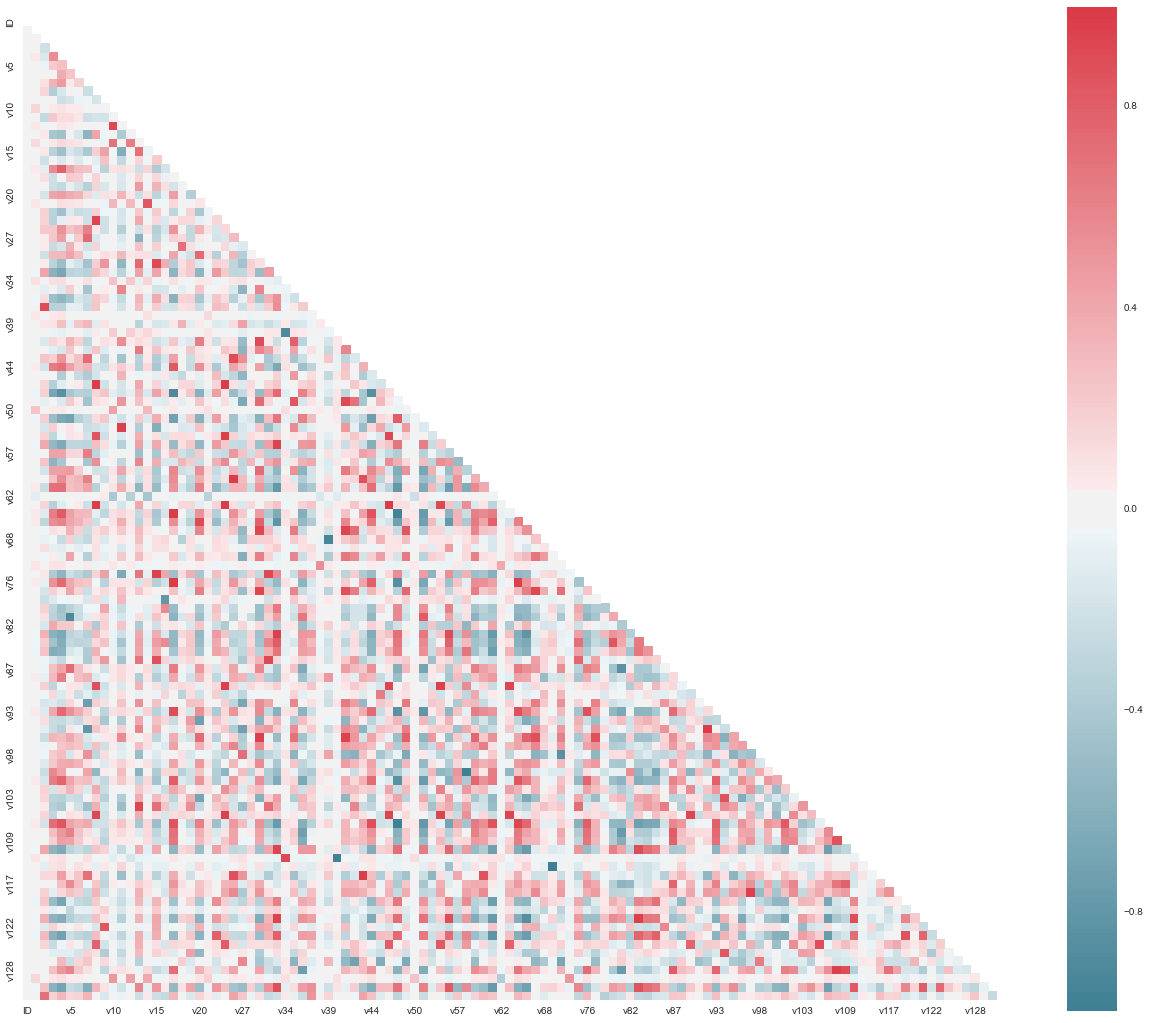

In [19]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5, ax=ax)

#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
#            square=True, xticklabels=5, yticklabels=5,
#            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#sns.heatmap(corr, mask=mask, vmax=.3, square=True)

#### 1.4.3. Types of Variables 
* Float 
* Integer
* String




---
### 1.5. Data Transform

* <b>Categorical variables</b>: Convert to sparse metrics/dummies using get_dummies().
* <b>Integer (Continuous) variables</b>: Less than 20 unique integers. Converted to categorical data.
* <b>Float (Continuous) variables</b>: No transformation.

<br>

--- 

### 1.6. Imputation
#### 1.6.1. Missing Values
- Dropping vs. Keeping
- No definition / description of each variable 
- No information of dropping all the missing values
<br>

#### 1.6.2. Imputation for Continous Variavbles
* (Simple dropping)
* Imputation with median
* Imputation with mean
* Imputation with extreme number (such as -999)
* Imputation with "Prediction Model": Use supervised algorithms (Linear regression, KNN, Tree-based, etc) to predict the variables with missingness based on other variables.
* Dropping highly correlated variables (correlation > .9)


#### 1.6.3. Imputation for Catagorical Variables 
* Imputed with Mode (the most frequently occurred one)
* Imputed with another category (such as, String "NA")
* (Simple dropping)


<br>

--- 

### 1.7. Prediction (Classification)
  - KNN
  - Logistic Regression
  - Random Forest
  - Decision Tree 
  - XGBoost
  - GBM (H20: Albat)